<a href="https://colab.research.google.com/github/higgsboson1209/Playing-with-3D-images/blob/main/saliencymaps_comparisons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
import math

In [ ]:
import pandas as pd

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
image=cv2.imread("/content/drive/My Drive/test.png")
tempimage=cv2.imread("/content/drive/My Drive/test.png",0)
image1=cv2.imread("/content/drive/My Drive/x_test1.png")
tempimage1=cv2.imread("/content/drive/My Drive/x_test1.png",0)
image2=cv2.imread("/content/drive/My Drive/x_test2.png")
tempimage2=cv2.imread("/content/drive/My Drive/x_test2.png",0)
image3=cv2.imread("/content/drive/My Drive/x_test3.png")
tempimage3=cv2.imread("/content/drive/My Drive/x_test3.png",0)
image4=cv2.imread("/content/drive/My Drive/x_test4.png")
tempimage4=cv2.imread("/content/drive/My Drive/x_test4.png",0)

In [ ]:
def FrequencyTunedSaliencyMap(image,tempimage):
  gaussimg=cv2.GaussianBlur(image,(5,5),0,0)
  print(image.shape)
  rows,cols=image.shape[0],image.shape[1]
  averages=[0,0,0]
  imgSal=np.zeros((rows,cols))
  for i in range(rows):
    for j in range(cols):
      x=gaussimg[i][j][0]
      y=gaussimg[i][j][1]
      z=gaussimg[i][j][2]
      averages[0]+=x
      averages[1]+=y
      averages[2]+=z
  averages=np.array(averages)
  averages=averages/(rows*cols)
  print(averages)
  for i in range(rows):
    for j in range(cols):
      x=gaussimg[i][j][0]
      y=gaussimg[i][j][1]
      z=gaussimg[i][j][2]
      imgSal[i,j]=(float) ((x-averages[0])**2 + (y-averages[1])**2 + (z-averages[2])**2)
  print(imgSal[102,102])
  
  new_image=cv2.normalize(imgSal,0,255,norm_type=cv2.NORM_MINMAX)
  plt.imsave('ftms3.png', new_image,cmap="gray")
  cv2_imshow(new_image)



In [ ]:
def spectralsaliency(image):
  sm=cv2.saliency.StaticSaliencySpectralResidual_create()
  (success, saliencyMap) = sm.computeSaliency(image)
  saliencyMap = (saliencyMap * 255).astype("uint8")
  threshMap = cv2.threshold(saliencyMap.astype("uint8"), 0, 255,
	cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
  plt.imsave('spectralsaliency4.png', saliencyMap,cmap="gray")
  cv2_imshow(threshMap)

In [ ]:
def finegrainedsaliency(image):
  # initialize OpenCV's static fine grained saliency detector and
  # compute the saliency map
  saliency = cv2.saliency.StaticSaliencyFineGrained_create()
  (success, saliencyMap) = saliency.computeSaliency(image)
  saliencyMap = (saliencyMap * 255).astype("uint8")
  # if we would like a *binary* map that we could process for contours,
  # compute convex hull's, extract bounding boxes, etc., we can
  # additionally threshold the saliency map
  threshMap = cv2.threshold(saliencyMap.astype("uint8"), 0, 255,
    cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
  # show the images
  plt.imsave('finegrainedsaliency4.png', saliencyMap,cmap="gray")
  cv2_imshow(saliencyMap)

In [ ]:
FrequencyTunedSaliencyMap(image3,tempimage3)

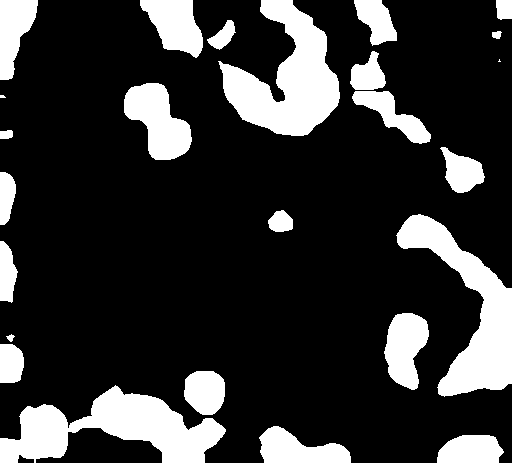

In [ ]:
spectralsaliency(image4)

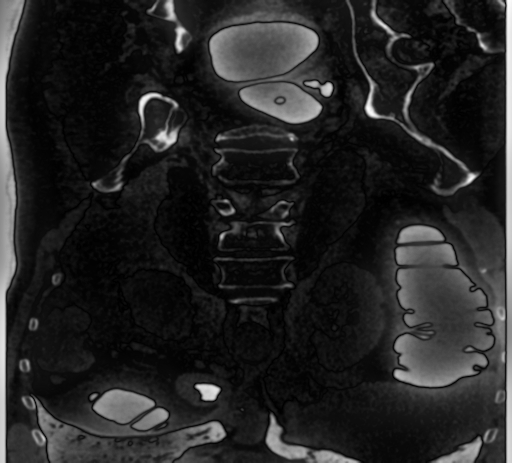

In [ ]:
finegrainedsaliency(image4)

In [ ]:
col_name=["Orignal Image","Frequency Tuned Saliency Maps","Fine Grained saliency maps","Spectral Residual Saliency maps"]

In [ ]:
my_df=pd.DataFrame(columns=col_name)

In [ ]:

!cp ftms.png "drive/My Drive/"

!cp spectralsaliency.png "drive/My Drive/"

!cp finegrainedsaliency.png "drive/My Drive/"


!cp ftms1.png "drive/My Drive/"

!cp spectralsaliency1.png "drive/My Drive/"

!cp finegrainedsaliency1.png "drive/My Drive/"


!cp ftms2.png "drive/My Drive/"

!cp spectralsaliency2.png "drive/My Drive/"

!cp finegrainedsaliency2.png "drive/My Drive/"


!cp ftms3.png "drive/My Drive/"

!cp spectralsaliency3.png "drive/My Drive/"

!cp finegrainedsaliency3.png "drive/My Drive/"


!cp ftms4.png "drive/My Drive/"

!cp spectralsaliency4.png "drive/My Drive/"

!cp finegrainedsaliency4.png "drive/My Drive/"

In [ ]:
country=["/content/drive/My Drive/test.png","/content/ftms.png","/content/finegrainedsaliency.png","/content/spectralsaliency.png"]
country1=["/content/drive/My Drive/x_test1.png","/content/ftms1.png","/content/finegrainedsaliency1.png","/content/spectralsaliency1.png"]
country2=["/content/drive/My Drive/x_test2.png","/content/ftms2.png","/content/finegrainedsaliency2.png","/content/spectralsaliency2.png"]
country3=["/content/drive/My Drive/x_test3.png","/content/ftms3.png","/content/finegrainedsaliency3.png","/content/spectralsaliency3.png"]
country4=["/content/drive/My Drive/x_test4.png","/content/ftms4.png","/content/finegrainedsaliency4.png","/content/spectralsaliency4.png"]

In [ ]:
length=len(my_df)

In [ ]:
length

1

In [ ]:
my_df.head()

,Orignal Image,Frequency Tuned Saliency Maps,Fine Grained saliency maps,Spectral Residual Saliency maps


In [ ]:
import glob
import random
import base64
import pandas as pd

from PIL import Image
from io import BytesIO
from IPython.display import HTML
import io

pd.set_option('display.max_colwidth', -1)


def get_thumbnail(path):
     # This "\\\\?\\" is used to prevent problems with long Windows paths
    i = Image.open(path)    
    return i

def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, 'png')
        return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
c1=list(map(lambda f: get_thumbnail(f),country))
c2=list(map(lambda f: get_thumbnail(f),country1))
c3=list(map(lambda f: get_thumbnail(f),country2))
c4=list(map(lambda f: get_thumbnail(f),country3))
c5=list(map(lambda f: get_thumbnail(f),country4))

In [ ]:
c1

[<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=512x463 at 0x7FE8D22AD160>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=512x463 at 0x7FE8D22AD208>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=512x463 at 0x7FE8D22AD438>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=512x463 at 0x7FE8D22AD9B0>]

In [ ]:
my_df.loc[length+1+1+1]=c5

In [ ]:
my_df.head()

,Orignal Image,Frequency Tuned Saliency Maps,Fine Grained saliency maps,Spectral Residual Saliency maps
0,<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=512x463 at 0x7FE8D22AD160>,<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=512x463 at 0x7FE8D22AD208>,<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=512x463 at 0x7FE8D22AD438>,<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=512x463 at 0x7FE8D22AD9B0>
1,<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=512x463 at 0x7FE8D22AD668>,<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=512x463 at 0x7FE8D22ADBE0>,<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=512x463 at 0x7FE8D22AD3C8>,<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=512x463 at 0x7FE8D22AD048>
2,<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=512x463 at 0x7FE8D22ADEB8>,<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=512x463 at 0x7FE8D22AD6D8>,<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=512x463 at 0x7FE8D22ADE80>,<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=512x463 at 0x7FE8D22ADD30>
3,<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=512x463 at 0x7FE8D22ADD68>,<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=512x463 at 0x7FE8D22AD198>,<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=512x463 at 0x7FE8D22ADCF8>,<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=512x463 at 0x7FE8D22ADF28>
4,<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=512x463 at 0x7FE8D22ADFD0>,<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=512x463 at 0x7FE8D1C01048>,<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=512x463 at 0x7FE8D1C010B8>,<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=512x463 at 0x7FE8D1C01128>


In [ ]:
from IPython.display import HTML 

In [ ]:
html = my_df.to_html() 
  
# write html to file 
text_file = open("index.html", "w") 
text_file.write(html) 
text_file.close() 


In [ ]:
html=(my_df.to_html(formatters={'Orignal Image': image_formatter,'Frequency Tuned Saliency Maps': image_formatter,'Fine Grained saliency maps': image_formatter,'Spectral Residual Saliency maps': image_formatter}, escape=False))
text_file = open("table.html", "w") 
text_file.write(html) 
text_file.close() 

In [ ]:
  HBC(image)

In [ ]:
import copy

In [ ]:

def sqr(x):
    return x * x
def sqrDist(l1, l2):
    return np.sum(np.power(np.array(l1,np.float32) - np.array(l2,np.float32),2))
def dist(l1, l2):
    return np.sqrt(sqrDist(l1, l2))
def Quantize(img3f,ratio=0.95,colorNums=(12,12,12)):
    clrTmp = [i - 0.0001 for i in colorNums]
    w = [colorNums[1] * colorNums[2],colorNums[2],1]
    idx1i = np.zeros((img3f.shape[0],img3f.shape[1]),np.int32)
    width = img3f.shape[1]
    height = img3f.shape[0]
    height_range =range(height)
    width_range = range(width)
    #build color pallet
    pallet = {}
    for y in height_range:
        for x in width_range:
            idx1i[y,x] = int(img3f[y,x,0]*clrTmp[0]) * w[0] + int(img3f[y,x,1] * clrTmp[1]) * w[1] + int(img3f[y,x,2] * clrTmp[2] )
            if idx1i[y,x] not in pallet.keys():
                pallet[idx1i[y,x]] = 1
            else:
                pallet[idx1i[y,x]] += 1
    #Find significant colors
    maxNum = 0
    num = [(pallet[key],key) for key in pallet] #(num,color) pairs in num
    num.sort(reverse=True)
    maxNum = len(num)
    maxDropNum = int(np.round(height*width*(1-ratio)))
    crnt = num[maxNum-1][0]
    while crnt < maxDropNum and maxNum > 1:
        crnt += num[maxNum-2][0]
        maxNum -= 1
    maxNum = 256 if maxNum > 256 else maxNum # To avoid very rarely case
    if maxNum <= 10:
        maxNum = 10 if len(num) > 10 else len(num)
    pallet.clear()
    for i in range(maxNum):
        pallet[num[i][1]] = i
    color3i = [[int(num[i][1] / w[0]),int(num[i][1] % w[0] / w[1]),int(num[i][1] % w[1])] for i in range(len(num))]
    for i in range(maxNum,len(num)):
        simIdx = 0
        simVal = (1 << 31) - 1 # int32 max
        for j in range(maxNum):
            d_ij = sqrDist(color3i[i],color3i[j])
            if d_ij < simVal:
                simVal = d_ij
                simIdx = j
        pallet[num[i][1]] = pallet[num[simIdx][1]]
    color3f = np.zeros((1,maxNum,3),np.float32)
    colorNum = np.zeros((1,maxNum),np.int32)
    for y in height_range:
        for x in width_range:
            idx1i[y,x] = pallet[idx1i[y,x]]
            color3f[0,idx1i[y,x]] += img3f[y,x]
            colorNum[0,idx1i[y,x]] += 1
    for i in range(color3f.shape[1]):
        color3f[0,i] /= colorNum[0,i]
    return color3f.shape[1],idx1i,color3f,colorNum
def SmoothBySaliency(colorNums1i,sal1f,delta,similar):
    if sal1f.shape[1] < 2:
        return
    binN = sal1f.shape[1]
    newSal1d = np.zeros((1,binN),np.float64)
    tmpNum = int(np.round(binN*delta))
    n =  tmpNum if tmpNum > 2 else 2
    dist = [0.0 for _ in range(n)]
    val = copy.deepcopy(dist)
    w = copy.deepcopy(dist)
    binN_range = range(binN)
    n_range = range(n)
    for i in binN_range:
        totalDist = 0.0
        totalWeight = 0.0
        for j in n_range:
            ithIdx = similar[i][j][1]
            dist[j] = similar[i][j][0]
            val[j] = sal1f[0,ithIdx]
            w[j] = colorNums1i[0,ithIdx]
            totalDist += dist[j]
            totalWeight += w[j]
        valCrnt = 0.0
        for j in n_range:
            valCrnt += val[j] * (totalDist - dist[j]) * w[j]
        #print(valCrnt,totalDist,totalWeight)
        newSal1d[0,i] = valCrnt / (totalDist * totalWeight)
    cv2.normalize(newSal1d,sal1f,0,1,cv2.NORM_MINMAX)

def GetHC(img3f):
    binN,idx1i,binColor3f,colorNums1i = Quantize(img3f)
    print(binN)
    cv2.cvtColor(binColor3f,cv2.COLOR_BGR2Lab,binColor3f)
    weight1f = np.zeros(colorNums1i.shape,np.float32)
    cv2.normalize(colorNums1i.astype(np.float32),weight1f,1,0,cv2.NORM_L1)
    colorSal = np.zeros((1,binN),np.float64)
    similar = [[] for _ in range(binN)]
    for i in range(binN):
        similar[i].append([0.0,i])
        for j in range(binN):
            if i != j:
                dij = dist(binColor3f[0,i],binColor3f[0,j])
                similar[i].append([dij,j])
                colorSal[0,i] += weight1f[0,j] * dij
        similar[i].sort()
    SmoothBySaliency(np.ones(colorSal.shape,np.int32),colorSal,0.25,similar)
    salHC1f = np.zeros((img3f.shape[0],img3f.shape[1]),np.float64)
    width = img3f.shape[1]
    height = img3f.shape[0]
    h_range = range(height)
    w_range = range(width)
    for y in h_range:
        for x in w_range:
            salHC1f[y,x] = colorSal[0,idx1i[y,x]]
    cv2.GaussianBlur(salHC1f,(3,3),0,salHC1f)
    cv2.normalize(salHC1f,salHC1f,0,1,cv2.NORM_MINMAX)
    return salHC1f

In [ ]:
def getGCSM(img3i):
  img3f = img3i.astype(np.float32)
  print(np.min(img3f),np.max(img3f))
  
  img3f *= 1. / 255
  sal=(GetHC(img3f))
  start = cv2.getTickCount()
  end = cv2.getTickCount()
  idxs = np.where(sal < (sal.max()+sal.min()) / 1.8)
  img3i[idxs] = 0
  return sal
  sal = sal * 255
  sal = sal.astype(np.int16)
  cv2_imshow(sal.astype(np.int8))
  cv2_imshow(img3i)
  print(np.min(sal)) 
  print(np.max(sal))
  plt.imsave('GCSMtest.png', sal,cmap="gray")
  
  

In [ ]:
img3f = image.astype(np.float32)

In [ ]:
sal=getGCSM(image)

0.0 255.0
6


(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [2., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([     0. ,  23705.6,  47411.2,  71116.8,  94822.4, 118528. ,
        142233.6, 165939.2, 189644.8, 213350.4, 237056. ]),
 <a list of 2 Lists of Patches objects>)

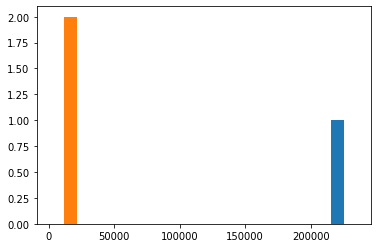

In [ ]:
plt.hist(np.histogram(sal,bins=1))

In [ ]:
np.unique(sal)

array([0.        , 0.71216609, 0.77652161, 0.85342859, 0.93477111,
       1.        ])

Read Medical Image Segmentation - 
  1) look at CNN models 
  2) Hybrid Deep Neural Networks 
  3) Probability maps for images 
  4) Segmentation MICCAI